In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Key Detection

In [1]:
!pip install essentia

import essentia.streaming as ess
import essentia

# Initialize algorithms we will use
loader = ess.MonoLoader(filename='drive/MyDrive/Colab Notebooks/audios/stayin-alive-100bpm-30s.mp3')
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)

# Use default HPCP parameters for plots, however we will need higher resolution
# and custom parameters for better Key estimation

hpcp = ess.HPCP()
hpcp_key = ess.HPCP(size=36, # we will need higher resolution for Key estimation
                    referenceFrequency=440, # assume tuning frequency is 44100.
                    bandPreset=False,
                    minFrequency=20,
                    maxFrequency=3500,
                    weightType='cosine',
                    nonLinear=False,
                    windowSize=1.)

key = ess.Key(profileType='edma', # Use profile for electronic music
              numHarmonics=4,
              pcpSize=36,
              slope=0.6,
              usePolyphony=True,
              useThreeChords=True)

# Use pool to store data
pool = essentia.Pool()

# Connect streaming algorithms
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
spectralpeaks.magnitudes >> hpcp_key.magnitudes
spectralpeaks.frequencies >> hpcp_key.frequencies
hpcp_key.hpcp >> key.pcp
hpcp.hpcp >> (pool, 'tonal.hpcp')
key.key >> (pool, 'tonal.key_key')
key.scale >> (pool, 'tonal.key_scale')
key.strength >> (pool, 'tonal.key_strength')

# Run streaming network
essentia.run(loader)

print("Estimated key and scale:", pool['tonal.key_key'] + " " + pool['tonal.key_scale'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 25.2 MB/s eta 0:00:00
Estimated key and scale: Bb major


# Chord Coverage

In [2]:
import essentia.streaming as ess
import essentia

audio_file = 'drive/MyDrive/Colab Notebooks/audios/stayin-alive-100bpm-30s.mp3'

# Initialize algorithms we will use.
loader = ess.MonoLoader(filename=audio_file)
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)

# Use default HPCP parameters for plots.
# However we will need higher resolution and custom parameters for better Key estimation.

hpcp = ess.HPCP()

# Use pool to store data.
pool = essentia.Pool()

# Connect streaming algorithms.
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
hpcp.hpcp >> (pool, 'tonal.hpcp')

# Run streaming network.
essentia.run(loader)

['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'C#', 'C#', 'C#', 'C#m', 'C#m', 'C#', 'Ab', 'Ab', 'Ab', 'C#', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Bbm', 'Bbm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Fm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Fm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Ab', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', 'Bb', '

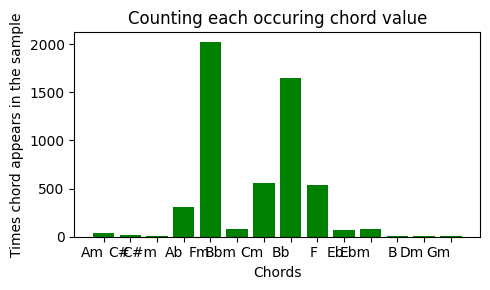

In [3]:
from essentia.standard import ChordsDetection
import matplotlib.pyplot as plt
from collections import Counter
import essentia.streaming as ess
import essentia

audio_file = 'drive/MyDrive/Colab Notebooks/audios/stayin-alive-100bpm-30s.mp3'

# Initialize algorithms we will use.
loader = ess.MonoLoader(filename=audio_file)
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500,
                                  maxPeaks=60)

# Use default HPCP parameters for plots.
# However we will need higher resolution and custom parameters for better Key estimation.

hpcp = ess.HPCP()

# Use pool to store data.
pool = essentia.Pool()

# Connect streaming algorithms.
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
hpcp.hpcp >> (pool, 'tonal.hpcp')

# Run streaming network.
essentia.run(loader)

# Using a 2 seconds window over HPCP matrix to estimate chords
chords, strength = ChordsDetection(hopSize=2048, windowSize=2)(pool['tonal.hpcp'])
print(chords)

#Filter Duplicate Chords from List
chords_set = list(dict.fromkeys(chords))
print(chords_set)

chord_counts = Counter(chords)

# Extracting chord labels and counts
chord_labels = list(chord_counts.keys())
chord_values = list(chord_counts.values())
print(chord_values)

# Creating the bar plot
plt.figure(figsize=(5, 3))
plt.bar(chord_labels, chord_values, color='green')
plt.xlabel('Chords')
plt.ylabel('Times chord appears in the sample')
plt.title('Counting each occuring chord value')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


HPCP Plot

In [ ]:
# Plots configuration.
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6)

# Plot HPCP.
imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
show()